# 数据来源  
零售商店提供的数据，反映的是零售商店中进行的交易的样本。零售商希望能更好的了解对于不同商品，消费者不同购买行为，从而通过借助已知的其他变量来预测消费者的购买量。

从另外一个角度，我们也可以预测消费者性别，年龄，甚至可以来预测商品的类别等。

# 提出问题  
- 1男性和女性的购买力差异
- 2各个年龄段的购买力差异
- 3婚姻状况是否对人们的购买力产生影响
- 4各个职业的购买力差异
- 5三个城市购物水平差异
- 6在城市呆的年限是否影响人们的购买力
- 7人们的购物水平差异，哪一类产品更受人们喜欢，以及最受欢迎的商品是哪些


# 数据清洗

## 数据信息  

User_ID：用户编码  

Product_ID：产品编码  

Gender：性别 （M为男性，F为女性）  

Age：年龄（0-17，18-25，26-35，36-45,46-50，51-55，55+ 7种） 

Occupation：职业（用数字代表具体职业，一共有20种职业） 

City_Category：城市分类（分为三类城市：ABC） 

Stay_In_Current_City_Years：在目前城市的居住的年数 （0，1,2，3,4+5种） 

Marital_Status：婚姻状况 （0代表未婚，1代表已婚） 

Product_Category_1：产品分类为1，不可为空 

Product_Category_2：产品分类为2  

Product_Category_3：产品分类为3  

Purchase：购买金额 （单位为美元）  

# 数据分析
## 导入数据

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
data = pd.read_csv('./BlackFriday.csv')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


- 这是一个 537577*12的数据集，每一行有12列不同属性的数据
- 我们可以选取前5列先观察一下数据集信息

In [214]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,combined_G_M
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370,F_0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,F_0
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422,F_0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057,F_0
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969,M_0


- 确认数据集是否存在缺失值

In [7]:
data.isnull().any()

User_ID                       False
Product_ID                    False
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category_1            False
Product_Category_2             True
Product_Category_3             True
Purchase                      False
dtype: bool

- 我们发现 Product_Category_2和Product_Category_3是存在缺失值的NAN的

In [9]:
data['Product_Category_2'].head()

0     NaN
1     6.0
2     NaN
3    14.0
4     NaN
Name: Product_Category_2, dtype: float64

In [10]:
data['Product_Category_3'].head()

0     NaN
1    14.0
2     NaN
3     NaN
4     NaN
Name: Product_Category_3, dtype: float64

In [14]:
print('Product_Category_2:',data['Product_Category_2'].unique())

Product_Category_2: [ nan   6.  14.   2.   8.  15.  16.  11.   5.   3.   4.  12.   9.  10.  17.
  13.   7.  18.]


In [19]:
print('Product_Category_3:',data['Product_Category_3'].unique())

Product_Category_3: [  0.  14.  17.   5.   4.  16.  15.   8.   9.  13.   6.  12.   3.  18.  11.
  10.]


In [20]:
print('Product_Category_1:',data['Product_Category_1'].unique())

Product_Category_1: [ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9]


- 我们需要填补缺失值 用0填补缺失值

In [16]:
data.fillna(value=0,inplace=True)

In [24]:
data.isnull().any()

User_ID                       False
Product_ID                    False
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category_1            False
Product_Category_2            False
Product_Category_3            False
Purchase                      False
dtype: bool

- 我们重新观察数据集，发现该数据集没有缺失数据，我们可以接下去处理数据

In [225]:
data['combined_ProductID_UserID']=data['User_ID'].map(str) + data['Product_ID'].map(str)
#print(data['combined_ProductID_UserID'])
# 一共有537577列

In [227]:
data['new_combined_ProductID_UserID'] = data['combined_ProductID_UserID'].unique()
data['new_combined_ProductID_UserID'].count()

537577

- 不存在重复数据，我们可以接着往下处理数据

In [21]:
print('Product_Category_1:',data['Product_Category_1'].unique())

Product_Category_1: [ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9]


In [22]:
print('Product_Category_2:',data['Product_Category_2'].unique())

Product_Category_2: [  0.   6.  14.   2.   8.  15.  16.  11.   5.   3.   4.  12.   9.  10.  17.
  13.   7.  18.]


In [23]:
print('Product_Category_3:',data['Product_Category_3'].unique())

Product_Category_3: [  0.  14.  17.   5.   4.  16.  15.   8.   9.  13.   6.  12.   3.  18.  11.
  10.]


##  解决问题
### 1男性和女性的购买力差异

In [26]:
data['Gender'].head()

0    F
1    F
2    F
3    F
4    M
Name: Gender, dtype: object

In [42]:
data.groupby('Gender').count()

,User_ID,Product_ID,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
Gender,,,,,,,,,,,
F,132197,132197,132197,132197,132197,132197,132197,132197,132197,132197,132197
M,405380,405380,405380,405380,405380,405380,405380,405380,405380,405380,405380


In [43]:
data.groupby('Gender').count()['User_ID']

Gender
F    132197
M    405380
Name: User_ID, dtype: int64

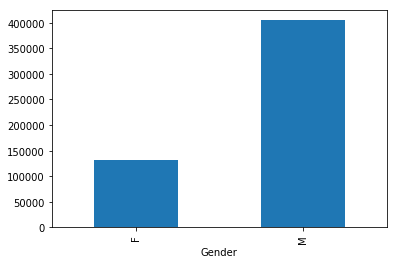

In [90]:
data.groupby('Gender').count()['User_ID'].plot(kind='bar')
plt.show()

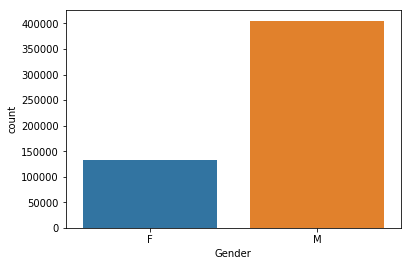

In [92]:
sns.countplot(data['Gender'])
plt.show()

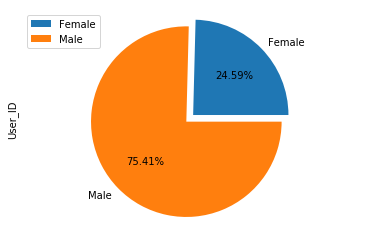

In [155]:
explode=(0.1,0)
Gender = ['Female','Male']
data.groupby('Gender').count()['User_ID'].plot(kind='pie',explode=explode,labels=Gender,autopct="%1.2f%%")
plt.axis('equal')
#plt.tight_layout()
plt.legend()
plt.show()

In [39]:
data.groupby('Gender')['Purchase'].max()

Gender
F    23959
M    23961
Name: Purchase, dtype: int64

In [33]:
data.groupby('Gender')['Purchase'].min()

Gender
F    185
M    185
Name: Purchase, dtype: int64

In [34]:
data.groupby('Gender')['Purchase'].sum()

Gender
F    1164624021
M    3853044357
Name: Purchase, dtype: int64

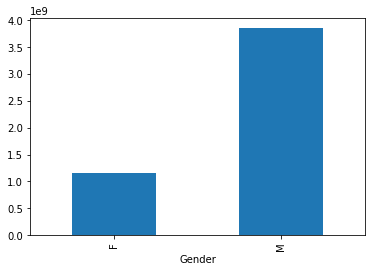

In [55]:
data.groupby('Gender')['Purchase'].sum().plot(kind='bar')
plt.show()

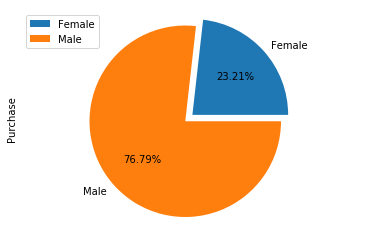

In [157]:
explode=(0.1,0)
Gender = ['Female','Male']
data.groupby('Gender')['Purchase'].sum().plot(kind='pie',labels=Gender,explode=explode,autopct="%1.2f%%")
plt.axis('equal')
plt.legend()
plt.show()

- 女性消费者人数132197，占总比的24.59%，男性消费者人数405380，占总比的75.41%
- 女性消费者的总消费金额为1164624021，占总比的23.21%，男性消费者的总消费金额为3853044357，占总比的76.79%
- 女性消费者一次最多消费金额为23959，男性消费者一次最多消费金额23961
- 女性消费者一次最少消费金额为185，男性消费者一次最少消费金额185
- 本次消费中，男性消费为主力消费者，女性消费者消费能力远远不及男性消费者

### 2各个年龄段的购买力差异

In [62]:
data.groupby('Age')['User_ID'].count()

Age
0-17      14707
18-25     97634
26-35    214690
36-45    107499
46-50     44526
51-55     37618
55+       20903
Name: User_ID, dtype: int64

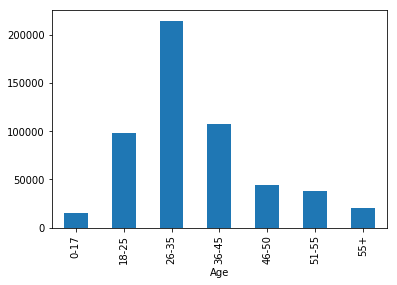

In [88]:
data.groupby('Age')['User_ID'].count().plot(kind='bar')
plt.show()

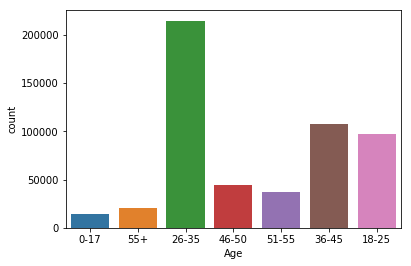

In [89]:
sns.countplot(data['Age'])
plt.show()

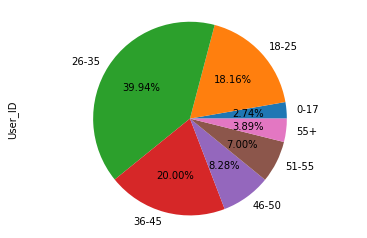

In [159]:
data.groupby('Age')['User_ID'].count().plot(kind='pie',autopct="%1.2f%%")
plt.axis('equal')
plt.show()

In [163]:
data.groupby('Age')['Purchase'].sum()

Age
0-17      132659006
18-25     901669280
26-35    1999749106
36-45    1010649565
46-50     413418223
51-55     361908356
55+       197614842
Name: Purchase, dtype: int64

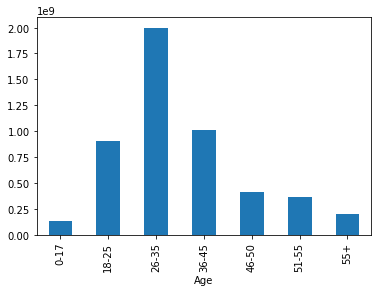

In [166]:
data.groupby('Age')['Purchase'].sum().sort_index().plot(kind='bar')
plt.show()

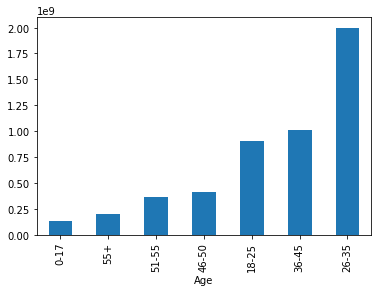

In [162]:
data.groupby('Age')['Purchase'].sum().sort_values().plot(kind='bar')
plt.show()

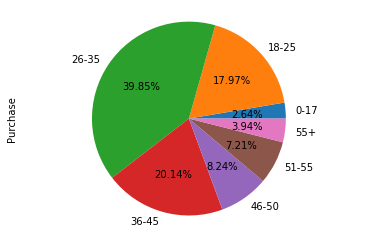

In [84]:
data.groupby('Age')['Purchase'].sum().plot(kind='pie',autopct="%1.2f%%")
plt.axis('equal')
plt.show()

In [67]:
data.groupby('Age')['Purchase'].mean()

Age
0-17     9020.126878
18-25    9235.197575
26-35    9314.588970
36-45    9401.478758
46-50    9284.872277
51-55    9620.616620
55+      9453.898579
Name: Purchase, dtype: float64

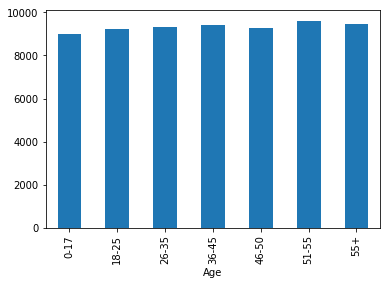

In [73]:
data.groupby('Age')['Purchase'].mean().plot(kind='bar')
plt.show()

- 本次消费中，消费人数占比最大群体是26-35岁，人数14707，占总人数比例的39.94%，同时他们也是总消费金额比例中最大的群体占比，金额1999749106，占总金额比例39.85%
- 消费人数占比最小群体是0-17岁，人数214690，占总人数比例的2.74%，同时他们也是总消费金额比例中最小的群体占比，金额132659006，占总金额比例2.64%
- 但是在各群体的平均消费金额中，各群体的平均消费状况大体处于接近状态，都在9000左右

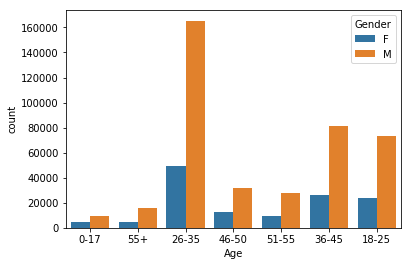

In [87]:
sns.countplot(data['Age'],hue=data['Gender'])
plt.show()

- 我们将性别和年龄结合在一起看，也会发现，在占比中，男性消费者人数在各个年龄段中也是处于领先的位置

### 3婚姻状况是否对人们的购买力产生影响

In [94]:
data.groupby(['Marital_Status'])['User_ID'].count()

Marital_Status
0    317817
1    219760
Name: User_ID, dtype: int64

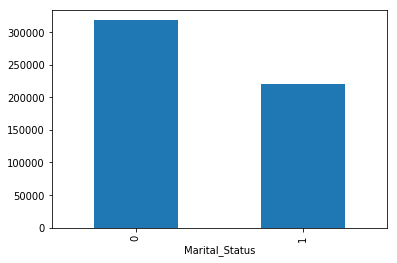

In [96]:
data.groupby(['Marital_Status'])['User_ID'].count().plot(kind='bar')
plt.show()

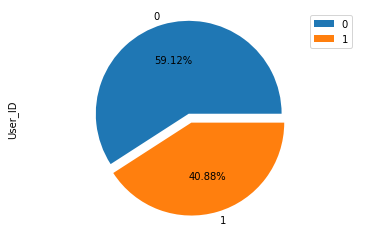

In [177]:
explode =(0.1,0)
data.groupby(['Marital_Status'])['User_ID'].count().plot(kind='pie',autopct="%1.2f%%",explode=explode,labels=data['Marital_Status'].unique())
plt.legend()
plt.axis('equal')
plt.show()

In [100]:
data.groupby(['Marital_Status'])['Purchase'].sum()

Marital_Status
0    2966289500
1    2051378878
Name: Purchase, dtype: int64

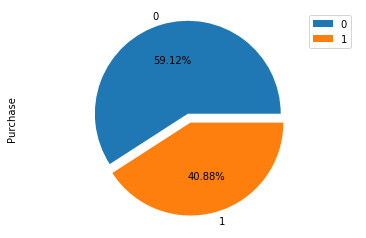

In [178]:
explode =(0.1,0)
data.groupby(['Marital_Status'])['Purchase'].sum().plot(kind='pie',autopct="%1.2f%%",explode=explode,labels=data['Marital_Status'].unique())
plt.axis('equal')
plt.legend()
plt.show()

In [104]:
data.groupby(['Marital_Status'])['Purchase'].mean()

Marital_Status
0    9333.325467
1    9334.632681
Name: Purchase, dtype: float64

- 本次消费中，未婚群体人数317817，占总人数的59.12%，已婚群体人数为219760，占总人数比重的40.88%
- 未婚人群的消费金额为2966289500，占总金额消费比重的59.12%，已婚人群的消费金额为2051378878，占总消费金额比重的40.88%
- 在总体上看，未婚群体的消费人数和消费总金额都是超过已婚群体的，但是两个群体的平均消费金额数目非常接近，未婚为9333.325467，已婚为9334.632681

In [113]:
data['combined_G_M'] = data.apply(lambda x:'%s_%s' % (x['Gender'],x['Marital_Status']),axis=1)
print(data['combined_G_M'].unique())

['F_0' 'M_0' 'M_1' 'F_1']


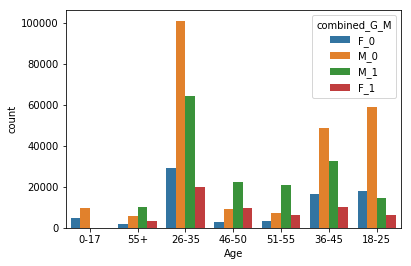

In [116]:
sns.countplot(data['Age'],hue=data['combined_G_M'])
plt.show()

- 将性别，年龄和婚姻状况结合在一起看，在0-17的数据中是不存在已婚人群的；另外26-35，36-45，18-25的群体中，男性未婚群体消费人数都是最多的，其次男性已婚群体消费能力也很显著。女性消费群体中未婚群体在18-25中占比相比之下略好于其他几个年龄段。女性总体消费情况在各个群体中，不管是已婚还是未婚，大部分都不在最前列。

### 4各个职业的购买力差异

In [118]:
data.groupby('Occupation')['User_ID'].count()

Occupation
0     68120
1     45971
2     25845
3     17366
4     70862
5     11985
6     19822
7     57806
8      1524
9      6153
10    12623
11    11338
12    30423
13     7548
14    26712
15    11812
16    24790
17    39090
18     6525
19     8352
20    32910
Name: User_ID, dtype: int64

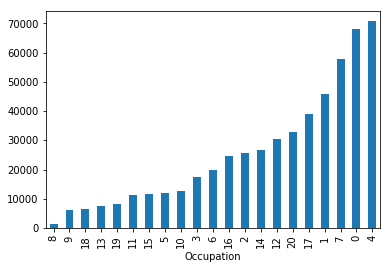

In [119]:
data.groupby('Occupation')['User_ID'].count().sort_values().plot(kind='bar')
plt.show()

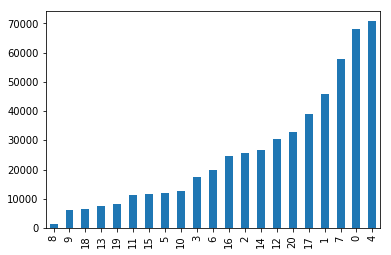

In [120]:
data['Occupation'].value_counts().sort_values().plot(kind='bar')
plt.show()

In [121]:
data.groupby('Occupation')['Purchase'].sum()

Occupation
0     625814811
1     414552829
2     233275393
3     160428450
4     657530393
5     112525355
6     185065697
7     549282744
8      14594599
9      53619309
10    114273954
11    105437359
12    300672105
13     71135744
14    255594745
15    116540026
16    234442330
17    387240355
18     60249706
19     73115489
20    292276985
Name: Purchase, dtype: int64

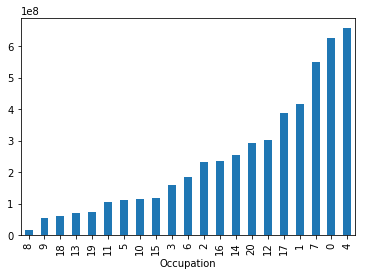

In [124]:
data.groupby('Occupation')['Purchase'].sum().sort_values().plot(kind='bar')
plt.show()

In [125]:
data.groupby('Occupation')['Purchase'].mean()

Occupation
0     9186.946726
1     9017.703095
2     9025.938982
3     9238.077277
4     9279.026742
5     9388.848978
6     9336.378620
7     9502.175276
8     9576.508530
9     8714.335934
10    9052.836410
11    9299.467190
12    9883.052460
13    9424.449391
14    9568.536426
15    9866.239925
16    9457.133118
17    9906.378997
18    9233.671418
19    8754.249162
20    8881.099514
Name: Purchase, dtype: float64

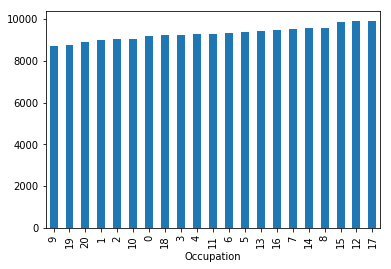

In [126]:
data.groupby('Occupation')['Purchase'].mean().sort_values().plot(kind='bar')
plt.show()

- 20个职业中，职业4的消费人数和消费总金额都是最高的，职业8的消费人数和消费总金额都是最少的
- 在每个职业的平均消费金额中，职业17的平均消费能力最强的，职业9是最少的

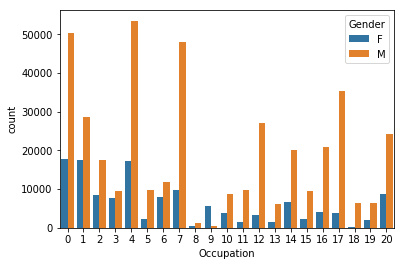

In [129]:
sns.countplot(data['Occupation'],hue=data['Gender'])
plt.show()

- 将职业和性别结合在一起，在各个职业中，除了职业9之外，男性消费中人数占比都是超过女性消费者的

###  5三个城市购物水平差异

In [130]:
data.groupby('City_Category')['User_ID'].count()

City_Category
A    144638
B    226493
C    166446
Name: User_ID, dtype: int64

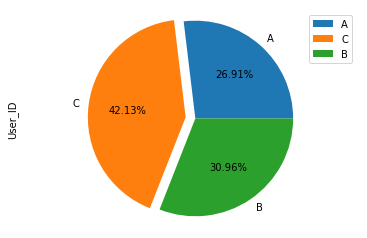

In [170]:
explode=(0,0.1,0)
data.groupby('City_Category')['User_ID'].count().plot(kind='pie',autopct="%1.2f%%",labels=data['City_Category'].unique(),explode=explode)
plt.axis('equal')
plt.legend()
plt.show()

In [132]:
data.groupby('City_Category')['Purchase'].sum()

City_Category
A    1295668797
B    2083431612
C    1638567969
Name: Purchase, dtype: int64

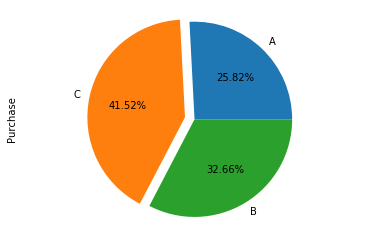

In [171]:
explode=(0,0.1,0)
data.groupby('City_Category')['Purchase'].sum().plot(kind='pie',autopct="%1.2f%%",explode=explode,labels=data['City_Category'].unique())
plt.axis('equal')
plt.show()

In [134]:
data.groupby('City_Category')['Purchase'].mean()

City_Category
A    8958.011014
B    9198.657848
C    9844.441855
Name: Purchase, dtype: float64

- 本次消费中，B市的消费人数和消费的总金额都是最高的，A市的消费人数和消费的总金额都是最少的
- 同时，在消费者的平均消费金额中，最高的是C市，最低的是A市

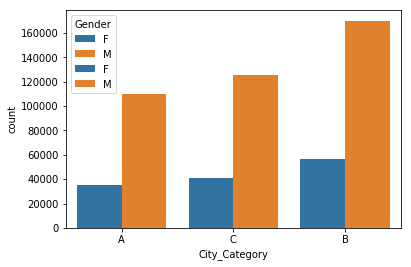

In [137]:
sns.countplot(data['City_Category'],hue=data['Gender'])
plt.show()

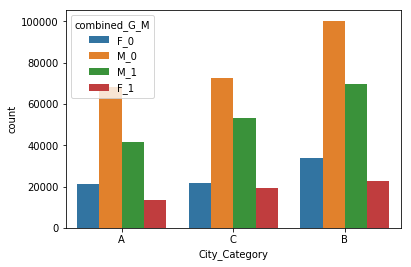

In [173]:
sns.countplot(data['City_Category'],hue=data['combined_G_M'])
plt.show()

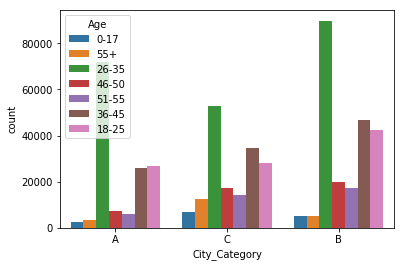

In [174]:
sns.countplot(data['City_Category'],hue=data['Age'])
plt.show()

- 三座城市的最主力消费群体都是男性，同时男女性消费者在婚姻角度上，都是未婚者的消费能力更强一些
- 三座城市中，26-35岁人群都是最强力的消费群体，其次都是36-45岁和18-25岁群体，0-17岁群体都是消费能力最少的群体

### 6在城市呆的年限是否影响人们的购买力

In [180]:
data['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [149]:
data['Stay_In_Current_City_Years'].head()

0     2
1     2
2     2
3     2
4    4+
Name: Stay_In_Current_City_Years, dtype: object

In [142]:
data.groupby('Stay_In_Current_City_Years')['User_ID'].count()

Stay_In_Current_City_Years
0      72725
1     189192
2      99459
3      93312
4+     82889
Name: User_ID, dtype: int64

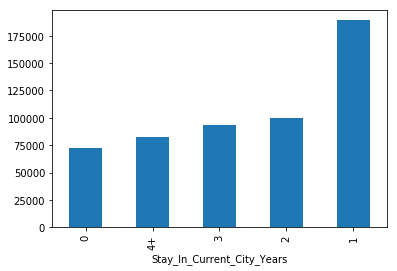

In [147]:
data.groupby('Stay_In_Current_City_Years')['User_ID'].count().sort_values().plot(kind='bar')
plt.show()

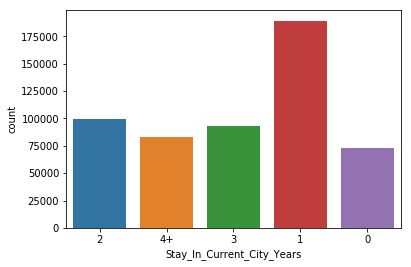

In [187]:
sns.countplot(data['Stay_In_Current_City_Years'])
plt.show()

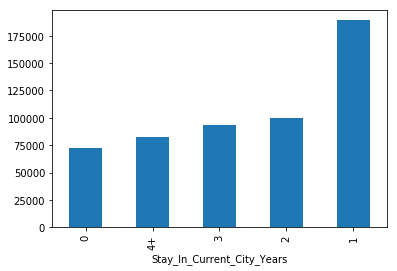

In [190]:
data.groupby('Stay_In_Current_City_Years')['Purchase'].count().sort_values().plot(kind='bar')
plt.show()

- 在一座城市居住时间一年的消费者的消费能力是最强的，但是短于一年的消费者则是消费能力最弱的群体

### 7人们的购物水平差异，哪一类产品更受人们喜欢，以及最受欢迎的商品是哪些

In [207]:
data.groupby('Product_ID')['Purchase'].max().sort_values().nlargest(10)

Product_ID
P00052842    23961
P00117642    23960
P00119342    23960
P00086242    23959
P00116142    23959
P00161842    23958
P00085342    23958
P00159542    23953
P00200642    23952
P00273342    23947
Name: Purchase, dtype: int64

In [210]:
data.groupby('Product_ID')['Purchase'].sum().sort_values().nlargest(10)

Product_ID
P00025442    27532426
P00110742    26382569
P00255842    24652442
P00184942    24060871
P00059442    23948299
P00112142    23882624
P00110942    23232538
P00237542    23096487
P00057642    22493690
P00010742    21865042
Name: Purchase, dtype: int64

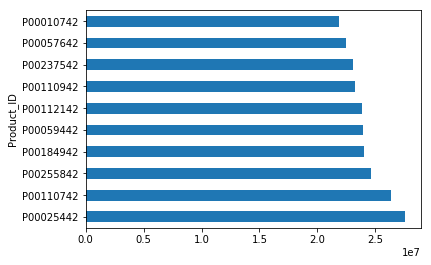

In [212]:
data.groupby('Product_ID')['Purchase'].sum().sort_values().nlargest(10).plot('barh')
plt.show()

In [205]:
data.groupby('Product_ID')['Purchase'].count().sort_values().nlargest(10)

Product_ID
P00265242    1858
P00110742    1591
P00025442    1586
P00112142    1539
P00057642    1430
P00184942    1424
P00046742    1417
P00058042    1396
P00059442    1384
P00145042    1384
Name: Purchase, dtype: int64

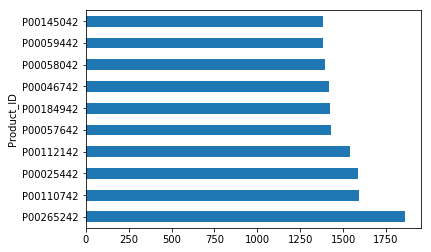

In [213]:
data.groupby('Product_ID')['Purchase'].count().sort_values().nlargest(10).plot('barh')
plt.show()

- 所有商品中，商品价格购买成交价最高的是P00052842为23961
- 以上两个图表示的是购买总价最高的10个商品和购买数量最高的10个商品
- 购买总价最高的商品是P00025442总的销售额为27532426，购买数量最高的商品是P00265242，一共卖出去了1858件

#### 对商品类别的处理

In [233]:
data.groupby('Product_Category_1')['Purchase'].count().sort_values(ascending=False)

Product_Category_1
5     148592
1     138353
8     112132
11     23960
2      23499
6      20164
3      19849
4      11567
16      9697
15      6203
13      5440
10      5032
12      3875
7       3668
18      3075
14      1500
17       567
9        404
Name: Purchase, dtype: int64

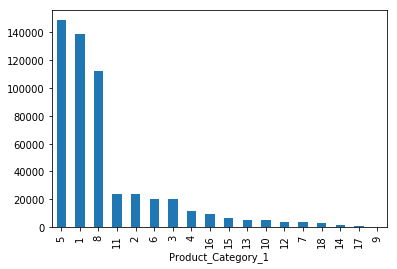

In [242]:
data.groupby('Product_Category_1')['Purchase'].count().sort_values(ascending=False).plot('bar')
plt.show()

In [244]:
data.groupby('Product_Category_1')['Purchase'].sum().sort_values(ascending=False)

Product_Category_1
1     1882666325
5      926917497
8      840693394
6      319355286
2      264497242
3      200412211
16     143168035
11     112203088
10      99029631
15      91658147
7       60059209
4       26937957
14      19718178
18       9149071
9        6277472
17       5758702
12       5235883
13       3931050
Name: Purchase, dtype: int64

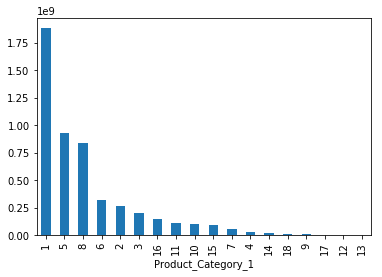

In [245]:
data.groupby('Product_Category_1')['Purchase'].sum().sort_values(ascending=False).plot('bar')
plt.show()

- 商品总类别1中，本次消费中的所有商品都属于商品类别1，其中卖出去数量最多的商品种类为5，最少为9；销售额最高的商品种类为5，最少为13

In [237]:
data.groupby('Product_Category_2')['Purchase'].count().sort_values(ascending=False)

Product_Category_2
0.0     166986
8.0      63058
14.0     54158
2.0      48481
16.0     42602
15.0     37317
5.0      25874
4.0      25225
6.0      16251
11.0     13945
17.0     13130
13.0     10369
9.0       5591
12.0      5419
10.0      2991
3.0       2835
18.0      2730
7.0        615
Name: Purchase, dtype: int64

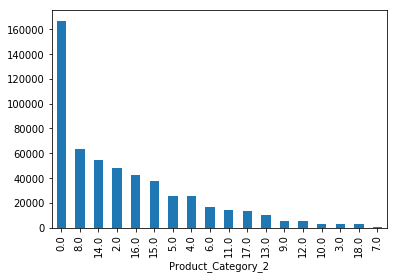

In [246]:
data.groupby('Product_Category_2')['Purchase'].count().sort_values(ascending=False).plot('bar')
plt.show()

In [248]:
data.groupby('Product_Category_2')['Purchase'].sum().sort_values(ascending=False)

Product_Category_2
0.0     1285099934
2.0      660395610
8.0      648112417
16.0     438744196
15.0     386556477
14.0     384866069
4.0      257757097
5.0      233747130
6.0      186896021
11.0     124608092
17.0     123639094
13.0     100291709
10.0      46827140
9.0       40716981
12.0      37763181
3.0       31835725
18.0      25582006
7.0        4229499
Name: Purchase, dtype: int64

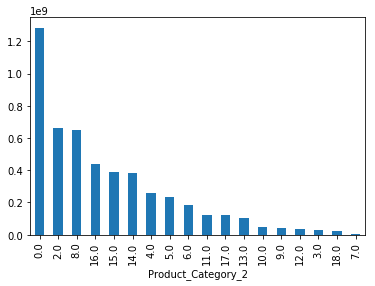

In [250]:
data.groupby('Product_Category_2')['Purchase'].sum().sort_values(ascending=False).plot('bar')
plt.show()

- 因为商品总类别2中存在缺失值，我们用0填补缺失值，重新观察数据，在商品类别2中，商品销售数量最多的是商品类别8，最少的是商品类别7；商品销售额最高的是商品类别2，最少的是商品类别7

In [232]:
data.groupby('Product_Category_3')['Purchase'].count().sort_values(ascending=False)

Product_Category_3
0.0     373299
16.0     32148
15.0     27611
14.0     18121
17.0     16449
5.0      16380
8.0      12384
9.0      11414
12.0      9094
13.0      5385
6.0       4818
18.0      4563
4.0       1840
11.0      1773
10.0      1698
3.0        600
Name: Purchase, dtype: int64

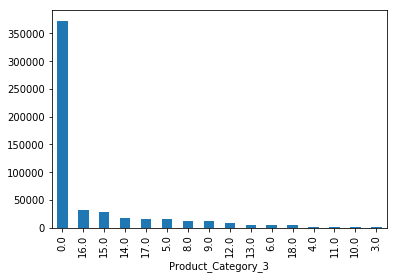

In [240]:
data.groupby('Product_Category_3')['Purchase'].count().sort_values(ascending=False).plot('bar')
plt.show()

In [251]:
data.groupby('Product_Category_3')['Purchase'].sum().sort_values(ascending=False)

Product_Category_3
0.0     3102022343
16.0     385213413
15.0     340670945
5.0      198662402
17.0     193760503
14.0     182187903
8.0      161357998
9.0      119043392
12.0      79288332
13.0      70990467
6.0       63548518
18.0      50118090
10.0      22962030
11.0      21475687
4.0       17992055
3.0        8374300
Name: Purchase, dtype: int64

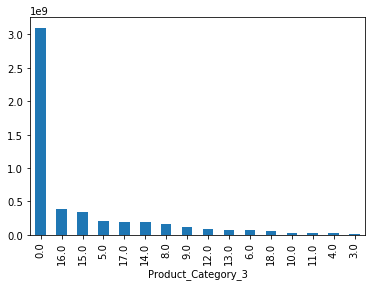

In [252]:
data.groupby('Product_Category_3')['Purchase'].sum().sort_values(ascending=False).plot('bar')
plt.show()

- 因为商品总类别3中存在缺失值，我们用0填补缺失值，重新观察数据，在商品类别3中，商品销售数量最多的是商品类别16，最少的是商品类别3；商品销售额最高的是商品类别16，最少的是商品类别3

# 总结
## 性别
- 女性消费者人数132197，占总比的24.59%，男性消费者人数405380，占总比的75.41%
- 女性消费者的总消费金额为1164624021，占总比的23.21%，男性消费者的总消费金额为3853044357，占总比的76.79%
- 女性消费者一次最多消费金额为23959，男性消费者一次最多消费金额23961
- 女性消费者一次最少消费金额为185，男性消费者一次最少消费金额185
- 本次消费中，男性消费为主力消费者，女性消费者消费能力远远不及男性消费者
- 男性消费者的消费金额是高于女性消费者的。商家应该深入女性消费者群体中，从消费者的收入和支出角度出发，调查女性消费者心理活动以及她们偏爱的产品，刺激女性消费。
## 年龄
- 消费人数占比最大群体是26-35岁，人数14707，占总人数比例的39.94%，同时他们也是总消费金额比例中最大的群体占比，金额1999749106，占总金额比例39.85%
- 消费人数占比最小群体是0-17岁，人数214690，占总人数比例的2.74%，同时他们也是总消费金额比例中最小的群体占比，金额132659006，占总金额比例2.64%
- 但是在各群体的平均消费金额中，各群体的平均消费状况大体处于接近状态，都在9000左右
- 26-35的年龄段购买力最强 占总的消费群体的40% 0-17的年龄段购买力最弱；26-53年龄段消费能力最强，我们要考虑是人们的收入和消费欲望。
## 婚姻
- 未婚群体人数317817，占总人数的59.12%，已婚群体人数为219760，占总人数比重的40.88%
- 未婚人群的消费金额为2966289500，占总金额消费比重的59.12%，已婚人群的消费金额为2051378878，占总消费金额比重的40.88%
- 在总体上看，未婚群体的消费人数和消费总金额都是超过已婚群体的，但是两个群体的平均消费金额数目非常接近，未婚为9333.325467，已婚为9334.632681
- 未婚的购物能力最强。我们要考虑是不是因为结婚之后，人们有了储蓄存钱的习惯，购买欲下降；在未婚的情况下，人们的购买欲是不是会更强一些。考虑开拓市场的时候，是不是可以加强家庭用品方面的宣传和产品投入，来刺激已婚人群的购买欲望。
## 职业
- 20个职业中，职业4的消费人数和消费总金额都是最高的，职业8的消费人数和消费总金额都是最少的
- 在每个职业的平均消费金额中，职业17的平均消费能力最强的，职业9是最少的
- 整体职业4的购买力最强，职业8的购买力最弱；我们可以分析职业4的特点，为什么从事职业4的人购买力是最强的，是因为收入最高，还是因为职业偏好。
## 城市
- 三座城市的最主力消费群体都是男性，同时男女性消费者在婚姻角度上，都是未婚者的消费能力更强一些
- 三座城市中，26-35岁人群都是最强力的消费群体，其次都是36-45岁和18-25岁群体，0-17岁群体都是消费能力最少的群体
## 城市居住时间
- 在一座城市居住时间一年的消费者的消费能力是最强的，但是短于一年的消费者则是消费能力最弱的群体
## 商品情况
- 所有商品中，商品价格购买成交价最高的是P00052842为23961
- 以上两个图表示的是购买总价最高的10个商品和购买数量最高的10个商品
- 购买总价最高的商品是P00025442总的销售额为27532426，购买数量最高的商品是P00265242，一共卖出去了1858件
- 商品总类别1中，本次消费中的所有商品都属于商品类别1，其中卖出去数量最多的商品种类为5，最少为9；销售额最高的商品种类为5，最少为13
- 因为商品总类别2中存在缺失值，我们用0填补缺失值，重新观察数据，在商品类别2中，商品销售数量最多的是商品类别8，最少的是商品类别7；商品销售额最高的是商品类别2，最少的是商品类别7
- 因为商品总类别3中存在缺失值，我们用0填补缺失值，重新观察数据，在商品类别3中，商品销售数量最多的是商品类别16，最少的是商品类别3；商品销售额最高的是商品类别16，最少的是商品类别3
- 我们可以发现，购买次数和购买金额最多的并不是同一件产品，我们应该分析产品需求的价格和数量的关系；有些产品虽然购买的人多，但是单价不高，所以导致销售额不是最高，有些产品单价高，虽然销售额高，但是购买人数不是最多的。我们应该从中多挖掘各个产品的特点，为下一次销售制定更好的销售方针。